In [1]:
img_path = "../img_data3/2530_AV.png"
tsv_path = "../processed_data/2530_AV.tsv"

In [2]:
import pandas as pd

df = pd.read_csv(tsv_path, sep='\t', header=None, names=['xmin', 'xmax', 'label_ind'])
df

,xmin,xmax,label_ind
0,0.000000,0.158176,1
1,0.158176,0.255088,2
2,0.255088,0.378176,3
3,0.378176,0.538176,4
4,0.538176,0.678176,1
5,0.678176,0.818176,2
6,0.818176,0.958176,3
7,0.958176,1.098176,4
8,1.098176,1.218176,1
9,1.218176,1.358176,2


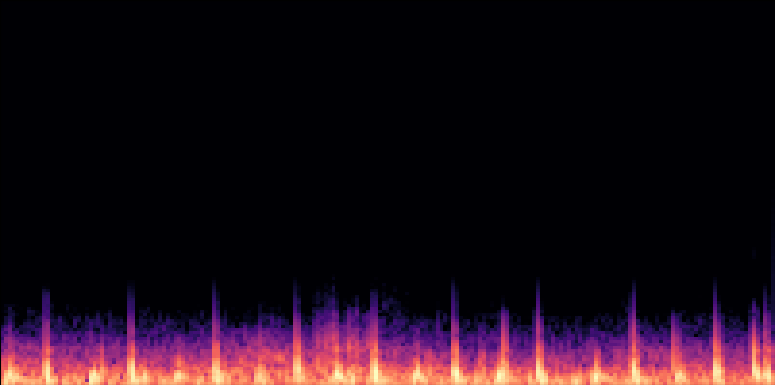

이미지 너비: 775px
이미지 높이: 385px


In [3]:
from PIL import Image
image = Image.open(img_path)

display(Image.open(img_path))
width, height = image.size

# 이미지 크기 출력
print(f'이미지 너비: {width}px')
print(f'이미지 높이: {height}px')


In [4]:
import numpy as np
np.array(image).shape

(385, 775, 4)

In [5]:
# 775/5 = 155
df['xmin'] = 155*df['xmin']
df['xmax'] = 155*df['xmax']

In [6]:
df.head()

,xmin,xmax,label_ind
0,0.00000,24.51728,1
1,24.51728,39.53864,2
2,39.53864,58.61728,3
3,58.61728,83.41728,4
4,83.41728,105.11728,1


In [7]:
import numpy as np
image = Image.open(img_path)
image_np = np.array(image)


In [8]:
df['ymin'] = 0
df['ymax'] = 150

In [9]:
df[df['label_ind']==3]

,xmin,xmax,label_ind,ymin,ymax
2,39.53864,58.61728,3,0,150
6,126.81728,148.51728,3,0,150
10,210.51728,229.11728,3,0,150
14,291.11728,306.61728,3,0,150
18,371.71728,390.31728,3,0,150
22,452.31728,470.91728,3,0,150
26,536.01728,557.71728,3,0,150
30,632.11728,650.71728,3,0,150
34,709.61728,728.21728,3,0,150


In [10]:
from PIL import Image, ImageDraw
import numpy as np
import math

import math

import math

def find_ymin_ymax(spectrogram, df):
    for index, row in df.iterrows():
        # Get the spectrogram slice corresponding to the xmin and xmax range
        xmin = math.ceil(float(row['xmin']))
        xmax = math.ceil(float(row['xmax']))
        
        # Ensure xmin and xmax are within valid range
        xmin = max(0, min(xmin, spectrogram.shape[1] - 1))
        xmax = max(0, min(xmax, spectrogram.shape[1] - 1))
        
        # Get the spectrogram slice
        spec_slice = spectrogram[:, xmin:xmax + 1, :3]  # Exclude the alpha channel
        
        # Check if spec_slice is not empty
        if spec_slice.size > 0:
            # Calculate ymin and ymax for the spectrogram slice
            non_black_rows = np.any(spec_slice != 0, axis=2)
            df.at[index, 'ymax'] = row['xmin'] + np.argmax(non_black_rows)
            df.at[index, 'ymin'] = row['xmin'] + len(non_black_rows) - np.argmax(non_black_rows[::-1])
        else:
            # Handle the case when spec_slice is empty
            df.at[index, 'ymax'] = row['xmin']
            df.at[index, 'ymin'] = row['xmin']
    
    return df





# Example usage:
# Replace 'your_spectrogram' with your actual spectrogram image data
your_spectrogram = np.array(image)


result_dataframe = find_ymin_ymax(your_spectrogram, df)


In [11]:
result_dataframe.head()

,xmin,xmax,label_ind,ymin,ymax
0,0.00000,24.51728,1,384.00000,27.00000
1,24.51728,39.53864,2,409.51728,40.51728
2,39.53864,58.61728,3,424.53864,59.53864
3,58.61728,83.41728,4,443.61728,84.61728
4,83.41728,105.11728,1,468.41728,106.41728


In [12]:
#result_dataframe['ymin'] = 0dd

In [16]:
df['ymin'] = 100
df['ymax'] = 0

In [12]:
df.head()

,xmin,xmax,label_ind,ymin,ymax
0,0.00000,24.51728,1,384.00000,27.00000
1,24.51728,39.53864,2,409.51728,40.51728
2,39.53864,58.61728,3,424.53864,59.53864
3,58.61728,83.41728,4,443.61728,84.61728
4,83.41728,105.11728,1,468.41728,106.41728


In [33]:
import cv2
import numpy as np

def get_ymax_of_non_black_part(image):
    # 이미지를 읽어온다.
    img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)

    # 이미지의 높이와 너비를 구한다.
    height, width = img.shape[:2]

    # 검정색이 아닌 픽셀의 위치를 찾는다.
    non_black_pixels = cv2.findNonZero(img)

    # 검정색이 아닌 픽셀이 있으면 가장 높은 y값을 반환한다.
    if non_black_pixels is not None and len(non_black_pixels) > 0:
        max_y = np.max(non_black_pixels[:, 0, 1])
        return max_y

    # 검정색이 아닌 픽셀이 없으면 -1을 반환한다.
    else:
        return -1


In [34]:
if __name__ == "__main__":
    # 이미지 파일의 경로를 지정한다.
    image_path = "../img_data3/13918_AV.png"

    # ymax값을 계산한다.
    ymax = get_ymax_of_non_black_part(image_path)

    # ymax값을 출력한다.
    print("ymax:", ymax)


ymax: 384


이미지 너비: 775px
이미지 높이: 385px


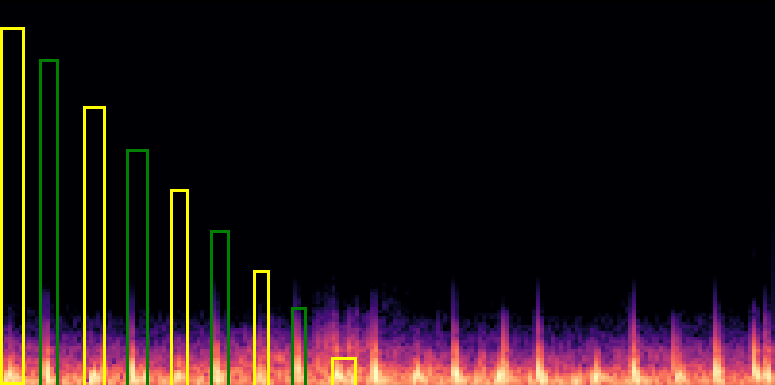

In [13]:
from PIL import Image, ImageDraw

image = Image.open(img_path)
width, height = image.size
# 이미지 크기 출력
print(f'이미지 너비: {width}px')
print(f'이미지 높이: {height}px')

# 필터링: label_ind가 1 또는 3인 경우에만 bbox 그리기
filtered_df = result_dataframe[result_dataframe['label_ind'].isin([1, 3])]

# Bounding Box 그리기
draw = ImageDraw.Draw(image)
for index, row in filtered_df.iterrows():
    bbox = {
        'xmin': int(row['xmin']),
        'ymin': int(row['ymin']),
        'xmax': int(row['xmax']),
        'ymax': int(row['ymax'])
    }
    if row['label_ind'] == 1:
        # 노란색으로 그리기
        draw.rectangle([bbox['xmin'], bbox['ymin'], bbox['xmax'], bbox['ymax']], outline='yellow', width=3)
    elif row['label_ind'] == 3:
        # 초록색으로 그리기
        draw.rectangle([bbox['xmin'], bbox['ymin'], bbox['xmax'], bbox['ymax']], outline='green', width=3)

display(image)

In [16]:
root = "../processed_data/"

In [17]:
import glob

files = sorted(glob.glob(root + '**/*.tsv', recursive=True))
print(len(files))
print(files[0])

3162
../processed_data\13918_AV.tsv


In [18]:
for file in files:
    save_path = file.replace("processed_data", "new_data3")
    df = pd.read_csv(file, sep='\t', header=None, names=['xmin', 'xmax', 'label_ind'])
    
    df['ymin'] = 100
    df['ymax'] = 0
    df['xmin'] = 155*df['xmin']
    df['xmax'] = 155*df['xmax']
    
    df = df[['xmin', 'ymin', 'xmax', 'ymax', 'label_ind']]
    
    df.to_csv(save_path, sep='\t', header=False, index=False)
    print('완료')


완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완

In [24]:
import shutil

# 폴더를 압축할 경로
folder_to_compress = '/aiffel/aiffel/AAAPrac/TON/physionet.org/files/circor-heart-sound/1.0.3/new_data3'

# 압축 파일의 이름
output_zip_file = '/aiffel/aiffel/AAAPrac/TON/physionet.org/files/circor-heart-sound/1.0.3/new_tsv3.zip'

# shutil.make_archive를 사용하여 폴더를 압축
shutil.make_archive(output_zip_file, 'zip', folder_to_compress)

print(f'폴더가 압축되었습니다: {output_zip_file}')


폴더가 압축되었습니다: /aiffel/aiffel/AAAPrac/TON/physionet.org/files/circor-heart-sound/1.0.3/new_tsv3.zip


## 확인

이미지 너비: 1240px
이미지 높이: 369px


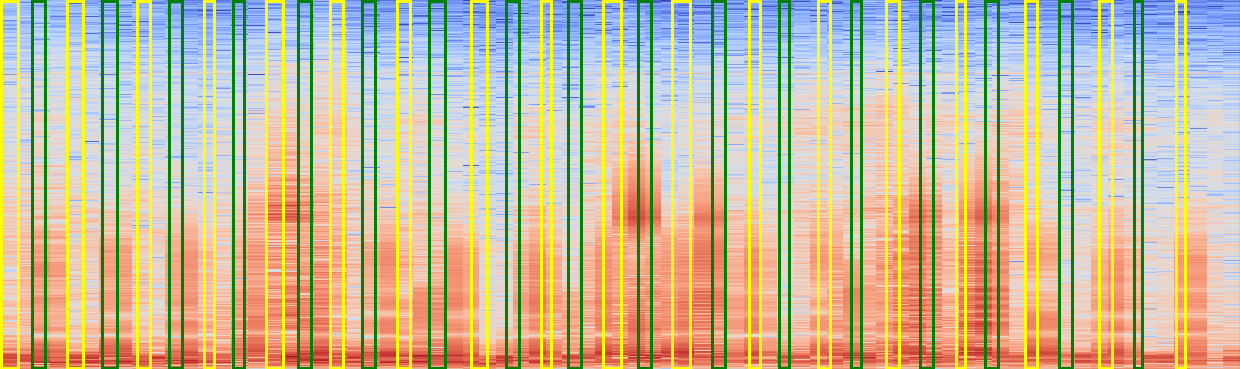

In [26]:

import pandas as pd

tsv_path = "/aiffel/aiffel/AAAPrac/TON/physionet.org/files/circor-heart-sound/1.0.3/new_data3/2530_AV.tsv"
df = pd.read_csv(tsv_path, sep='\t', header=None, names=['xmin', 'ymin', 'xmax', 'ymax', 'label_ind'])

from PIL import Image, ImageDraw

image = Image.open(img_path)
width, height = image.size
# 이미지 크기 출력
print(f'이미지 너비: {width}px')
print(f'이미지 높이: {height}px')

# 필터링: label_ind가 1 또는 3인 경우에만 bbox 그리기
filtered_df = df[df['label_ind'].isin([1, 3])]

# Bounding Box 그리기
draw = ImageDraw.Draw(image)
for index, row in filtered_df.iterrows():
    bbox = {
        'xmin': int(row['xmin']),
        'ymin': int(row['ymin']),
        'xmax': int(row['xmax']),
        'ymax': int(row['ymax'])
    }
    if row['label_ind'] == 1:
        # 노란색으로 그리기
        draw.rectangle([bbox['xmin'], bbox['ymin'], bbox['xmax'], bbox['ymax']], outline='yellow', width=3)
    elif row['label_ind'] == 3:
        # 초록색으로 그리기
        draw.rectangle([bbox['xmin'], bbox['ymin'], bbox['xmax'], bbox['ymax']], outline='green', width=3)

# 이미지 표시
image.show()